In [28]:
import pandas as pd
import numpy as np
data = pd.read_csv('InputFile.csv')

In [29]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


Preprocessing now starts

how do we identify what relevent for prediction?
This depends on domain knowledge. Here, few col does not contribute for fraud report. So, we remove those columns

In [30]:
col_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','total_claim_amount','age']
data.drop(columns=col_drop,inplace=True)


In [31]:
data = data.replace('?',np.nan)
data.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NaN,0,0,NaN,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NaN,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


Filling missing values

In [32]:
data.isna().sum()
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           500 non-null    int64  
 1   policy_csl                   500 non-null    object 
 2   policy_deductable            500 non-null    int64  
 3   policy_annual_premium        500 non-null    float64
 4   umbrella_limit               500 non-null    int64  
 5   insured_sex                  500 non-null    object 
 6   insured_education_level      500 non-null    object 
 7   insured_occupation           500 non-null    object 
 8   insured_relationship         500 non-null    object 
 9   capital-gains                500 non-null    int64  
 10  capital-loss                 500 non-null    int64  
 11  incident_type                500 non-null    object 
 12  collision_type               410 non-null    object 
 13  incident_severity   


collision_type                  90 \n
property_damage                187
police_report_available        176

These are  categorical data so we use categorical imputer from sklearn Library to fill missing data


In [33]:
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

simpleimputer from sk_learn not working on 1d matrix.
so, we used CategoricalImputer from sklearn_pandas 1.5.0

In [34]:
data['collision_type']              = imputer.fit_transform(data['collision_type'])
data['property_damage']             = imputer.fit_transform(data['property_damage'])
data['police_report_available']     = imputer.fit_transform(data['police_report_available'])

Separating Categorical from data file for Label Encoding

In [35]:
cat_data = data.select_dtypes(include=['object']).copy()
num_data = data.select_dtypes(include=['int64','float64']).copy()

In [37]:
cat_data.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


In [ ]:
print(cat_data['policy_csl'].unique())
print(cat_data['insured_education_level'].unique())
print(cat_data['incident_type'].unique())
print(cat_data['collision_type'].unique())
print(cat_data['incident_severity'].unique())

['250/500' '100/300' '500/1000']
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
['Side Collision' 'Rear Collision' 'Front Collision']
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']


A. transform Categorical data into numerical data by mapping

In [ ]:
cat_data['policy_csl']                = cat_data['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_data['insured_education_level']   = cat_data['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_data['incident_severity']         = cat_data['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_data['insured_sex']               = cat_data['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_data['property_damage']           = cat_data['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_data['police_report_available']   = cat_data['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_data['fraud_reported']            = cat_data['fraud_reported'].map({'N' : 0, 'Y' : 1})

B. transform Categorical data into numerical data by using Get_dummies

In [ ]:
for col_title in cat_data.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    cat_data = pd.get_dummies(cat_data, columns=[col_title], prefix = [col_title],drop_first=True)
cat_data.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'fraud_reported', 'insured_occupation_armed-forces_1_1',
       'insured_occupation_craft-repair_1_1',
       'insured_occupation_exec-managerial_1_1',
       'insured_occupation_farming-fishing_1_1',
       'insured_occupation_handlers-cleaners_1_1',
       'insured_occupation_machine-op-inspct_1_1',
       'insured_occupation_other-service_1_1',
       'insured_occupation_priv-house-serv_1_1',
       'insured_occupation_prof-specialty_1_1',
       'insured_occupation_protective-serv_1_1',
       'insured_occupation_sales_1_1', 'insured_occupation_tech-support_1_1',
       'insured_occupation_transport-moving_1_1',
       'insured_relationship_not-in-family_1_1',
       'insured_relationship_other-relative_1_1',
       'insured_relationship_own-child_1_1',
       'insured_relationship_unmarried_1_1', 'insured_relationship_wife_1_1',
       'in

Concate categorical data and numerical data

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_data.head()
num_data1=scaler.fit_transform(num_data)
num_data1= pd.DataFrame(data=num_data, columns=num_data.columns)
num_data1.shape

(500, 13)

In [ ]:
training_feed = pd.concat([num_data1,cat_data],axis=1)
training_feed.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,0,0,1,0,0,1,0,0,0,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,...,0,0,0,0,1,0,0,0,0,1
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,...,0,0,1,0,0,0,0,0,0,1
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,...,0,0,0,1,1,0,0,1,0,0


Features and target

In [ ]:
x = training_feed.drop('fraud_reported',axis =1)
y = training_feed['fraud_reported']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      500 non-null    int64  
 1   policy_deductable                       500 non-null    int64  
 2   policy_annual_premium                   500 non-null    float64
 3   umbrella_limit                          500 non-null    int64  
 4   capital-gains                           500 non-null    int64  
 5   capital-loss                            500 non-null    int64  
 6   incident_hour_of_the_day                500 non-null    int64  
 7   number_of_vehicles_involved             500 non-null    int64  
 8   bodily_injuries                         500 non-null    int64  
 9   witnesses                               500 non-null    int64  
 10  injury_claim                            500 non-null    int64 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


(array([182.,   0.,   0., 167.,   0.,   0.,   0.,   0.,   0., 151.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

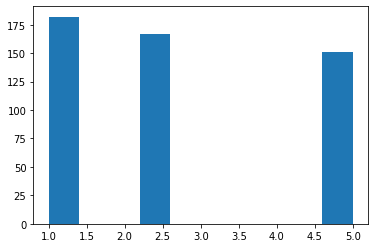

In [ ]:
plt.hist(training_feed['policy_csl'])

/home/juniorcoder/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy_csl', ylabel='insured_education_level'>

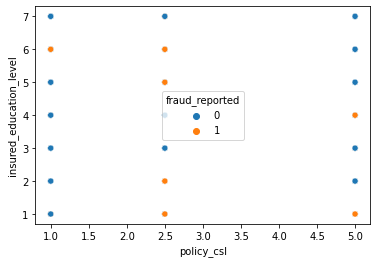

In [ ]:
import seaborn as sns
sns.scatterplot(training_feed['policy_csl'],training_feed['insured_education_level'],hue = training_feed['fraud_reported'])

<AxesSubplot:>

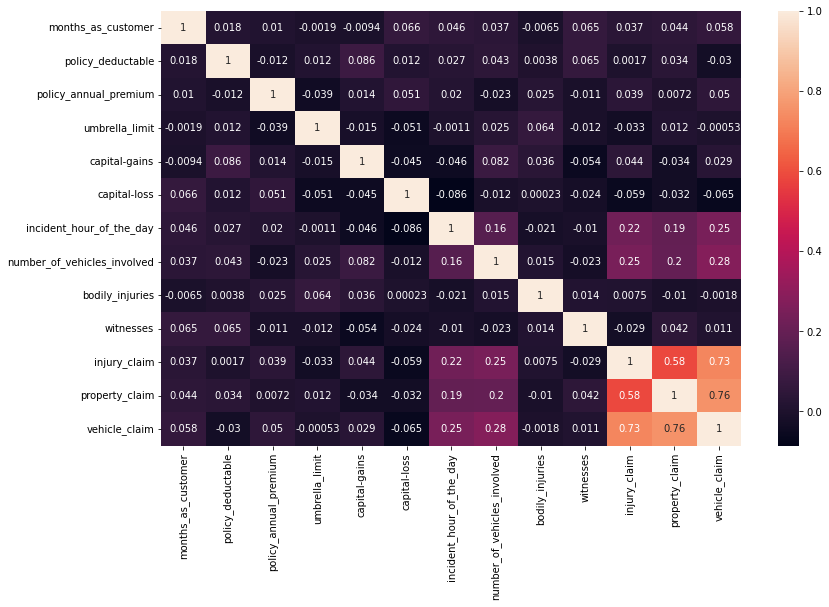

In [ ]:
plt.figure(figsize = (13,8))
sns.heatmap(num_data1.corr(),annot = True)

Clustering

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=355 ) 
print(x)

     months_as_customer  policy_deductable  policy_annual_premium  \
0                   328               1000                1406.91   
1                   228               2000                1197.22   
2                   134               2000                1413.14   
3                   256               2000                1415.74   
4                   228               1000                1583.91   
..                  ...                ...                    ...   
495                 261               1000                 870.55   
496                 321               2000                1344.56   
497                   0               1000                1377.04   
498                 405                500                1237.88   
499                 304               1000                1525.86   

     umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
0                 0          53300             0                         5   
1           500

In [ ]:
from sklearn.svm import SVC
sv_classifier=SVC()
y_pred = sv_classifier.fit(train_x, train_y)

y = y_pred.predict(test_x)
print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


scores


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,y))
    

0.704


Xgboost

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
zzmodel = xgb.fit(train_x, train_y)
y_pred =zzmodel.predict(test_x)


[19:20:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/juniorcoder/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/juniorcoder/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/juniorcoder/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.I

In [ ]:
ac2=accuracy_score(test_y,y_pred)

ac2

0.8